From http://earthpy.org/ulmo.html

**Task:**
    
    easy access to climatology data 
    
**Solution:**
    
    ulmo
    
[**Notebook file**](http://nbviewer.ipython.org/urls/raw.github.com/koldunovn/earthpy.org/master/content/ulmo.ipynb)

[Project ulmo](http://ulmo.readthedocs.org/en/latest/index.html) tries to provide "clean, simple and fast access to public hydrology and climatology data".

They certainly now do more hydrology than climatology data, but for me there is also something interesting - historical measurements from meteorological stations. In the following I will give you an example of how to access those, so you get an idea of what ulmo is doing.

Nessesary preparations, as usual:

In [1]:
%matplotlib inline

Installation is very simple with pip, but if you need development version, go to [githib repository](https://github.com/twdb/ulmo).

In [3]:
# !pip install ulmo

Import ulmo and pandas (you already use pandas for data analysis, right? if not, you have to, go and read [this post](http://earthpy.org/pandas-basics.html) first).

In [4]:
import ulmo
import pandas

/Users/robincole/anaconda3/lib/python3.6/site-packages/ulmo/twc/kbdi/core.py:20: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  CSV_SWITCHOVER = pandas.tslib.Timestamp('2016-10-01')


In [16]:
st = ulmo.ncdc.ghcn_daily.get_stations(country='GM', as_dataframe=True)

Now we have a nice table with information about all available Germany meteorological stations:

In [17]:
st.head()

,country,network,network_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wm_oid,id
id,,,,,,,,,,,,
GM000001153,GM,0,00001153,51.9506,7.5914,62.0,NaN,MUENSTER,NaN,NaN,10313,GM000001153
GM000001474,GM,0,00001474,53.1017,8.7842,4.0,NaN,BREMEN-SEEFAHRTSCHULE,NaN,NaN,10224,GM000001474
GM000002277,GM,0,00002277,49.7517,6.6467,144.0,NaN,TRIER,NaN,NaN,10609,GM000002277
GM000002288,GM,0,00002288,49.4253,7.7367,285.0,NaN,KAISERSLAUTERN,NaN,NaN,NaN,GM000002288
GM000002698,GM,0,00002698,49.0392,8.3650,112.0,NaN,KARLSRUHE,NaN,NaN,10727,GM000002698


In [18]:
st[st.name.str.contains('HAMBURG')]

,country,network,network_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wm_oid,id
id,,,,,,,,,,,,
GM000003865,GM,0,00003865,53.4806,10.2428,35.0,NaN,HAMBURG BERGEDORF,NaN,NaN,NaN,GM000003865
GM000010147,GM,0,00010147,53.6350,9.9900,11.0,NaN,HAMBURG FUHLSBUETTEL,GSN,NaN,10147,GM000010147
GME00123250,GM,E,00123250,53.5614,9.9883,14.0,NaN,HAMBURG-BOTANISCHER GARTEN,NaN,NaN,NaN,GME00123250
GME00123262,GM,E,00123262,53.4228,10.1475,2.0,NaN,HAMBURG-KIRCHWERDER,NaN,NaN,NaN,GME00123262
GME00123274,GM,E,00123274,53.4792,9.8983,3.0,NaN,HAMBURG-NEUWIEDENTHAL,NaN,NaN,NaN,GME00123274
GME00123286,GM,E,00123286,53.4714,10.1817,1.0,NaN,HAMBURG-REITBROOK,NaN,NaN,NaN,GME00123286
GME00123298,GM,E,00123298,53.5481,9.9703,35.0,NaN,HAMBURG-SANKT PAULI,NaN,NaN,NaN,GME00123298
GME00123322,GM,E,00123322,53.5867,10.1306,18.0,NaN,HAMBURG-WANDSBEK,NaN,NaN,NaN,GME00123322


Getting the data is also very easy,. The only thing you need is the id of your station:

In [19]:
data = ulmo.ncdc.ghcn_daily.get_data('GM000010147', as_dataframe=True)

/Users/robincole/anaconda3/lib/python3.6/site-packages/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)


AttributeError: 'PeriodIndexResampler' object has no attribute 'index'

This function returns dictionary with names of the variables as keys and pandas data frames with measurements as values:

In [15]:
data

NameError: name 'data' is not defined

Let's get maximum daily temperatures:

In [10]:
tm = data['TMAX'].copy()

In [11]:
tm.head()

,value,mflag,qflag,sflag
1891-01-01,-72,NaN,NaN,E
1891-01-02,-43,NaN,NaN,E
1891-01-03,-32,NaN,NaN,E
1891-01-04,12,NaN,NaN,E
1891-01-05,-29,NaN,NaN,E


Values has to be divided by 10 in order to get degrees Celsius:

In [12]:
tm.value=tm.value/10.0

Now you can plot the data, as you would usually do with pandas:

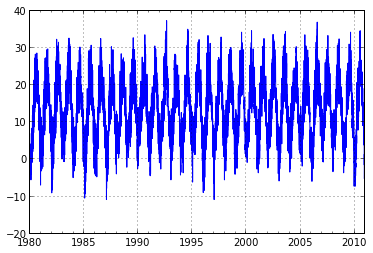

In [13]:
tm['value']['1980':'2010'].plot()

Or do some statistical analysis:

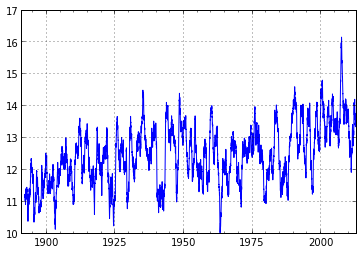

In [14]:
pandas.rolling_mean(tm.value, window=365).plot()

Unfortunately something like

    tm.value.resample('A')
    
will not work, since *value* have a type that pandas can't process in this case. We first have to convert *value* variable to float:

In [15]:
tm.value = tm.value.astype('float')

Now it's working:

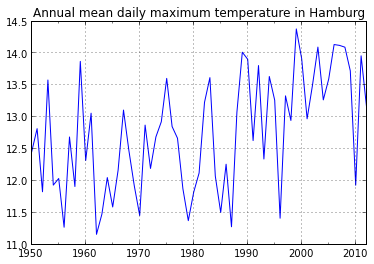

In [16]:
tm['1950':'2012'].value.resample('A').plot()
title('Annual mean daily maximum temperature in Hamburg')

Now you know how to easily find meteo station and get it's data with ulmo. Maybe if you want data only for one station ulmo is not that useful, but when you begin to collect statistics about many stations, then it became very handy. If you use hydrological data you certainly has to give ulmo a try ([see list of supported data sets](http://ulmo.readthedocs.org/en/latest/index.html#api-reference)). Hopefully authors will continue development and add more data sources in future:)